Homework Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('usa_housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [3]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


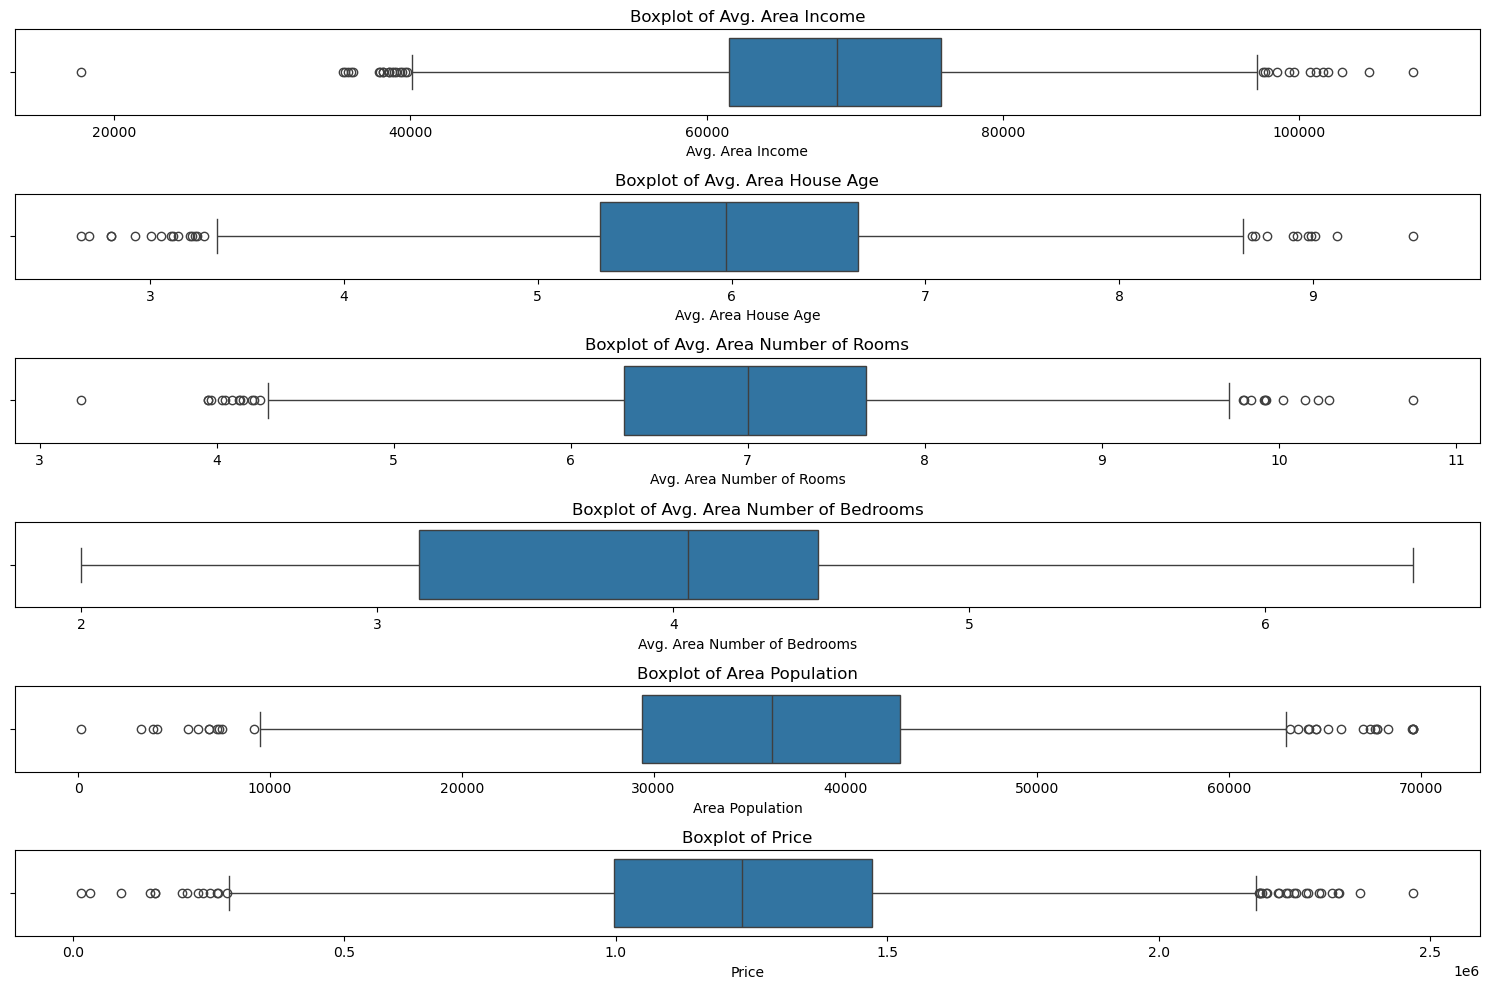

In [5]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [6]:
Q1 = df[numerical_columns].quantile(0.25)  
Q3 = df[numerical_columns].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.4 * IQR
upper_bound = Q3 + 1.4 * IQR

df = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4631 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4631 non-null   float64
 1   Avg. Area House Age           4631 non-null   float64
 2   Avg. Area Number of Rooms     4631 non-null   float64
 3   Avg. Area Number of Bedrooms  4631 non-null   float64
 4   Area Population               4631 non-null   float64
 5   Price                         4631 non-null   float64
 6   Address                       4631 non-null   object 
dtypes: float64(6), object(1)
memory usage: 289.4+ KB


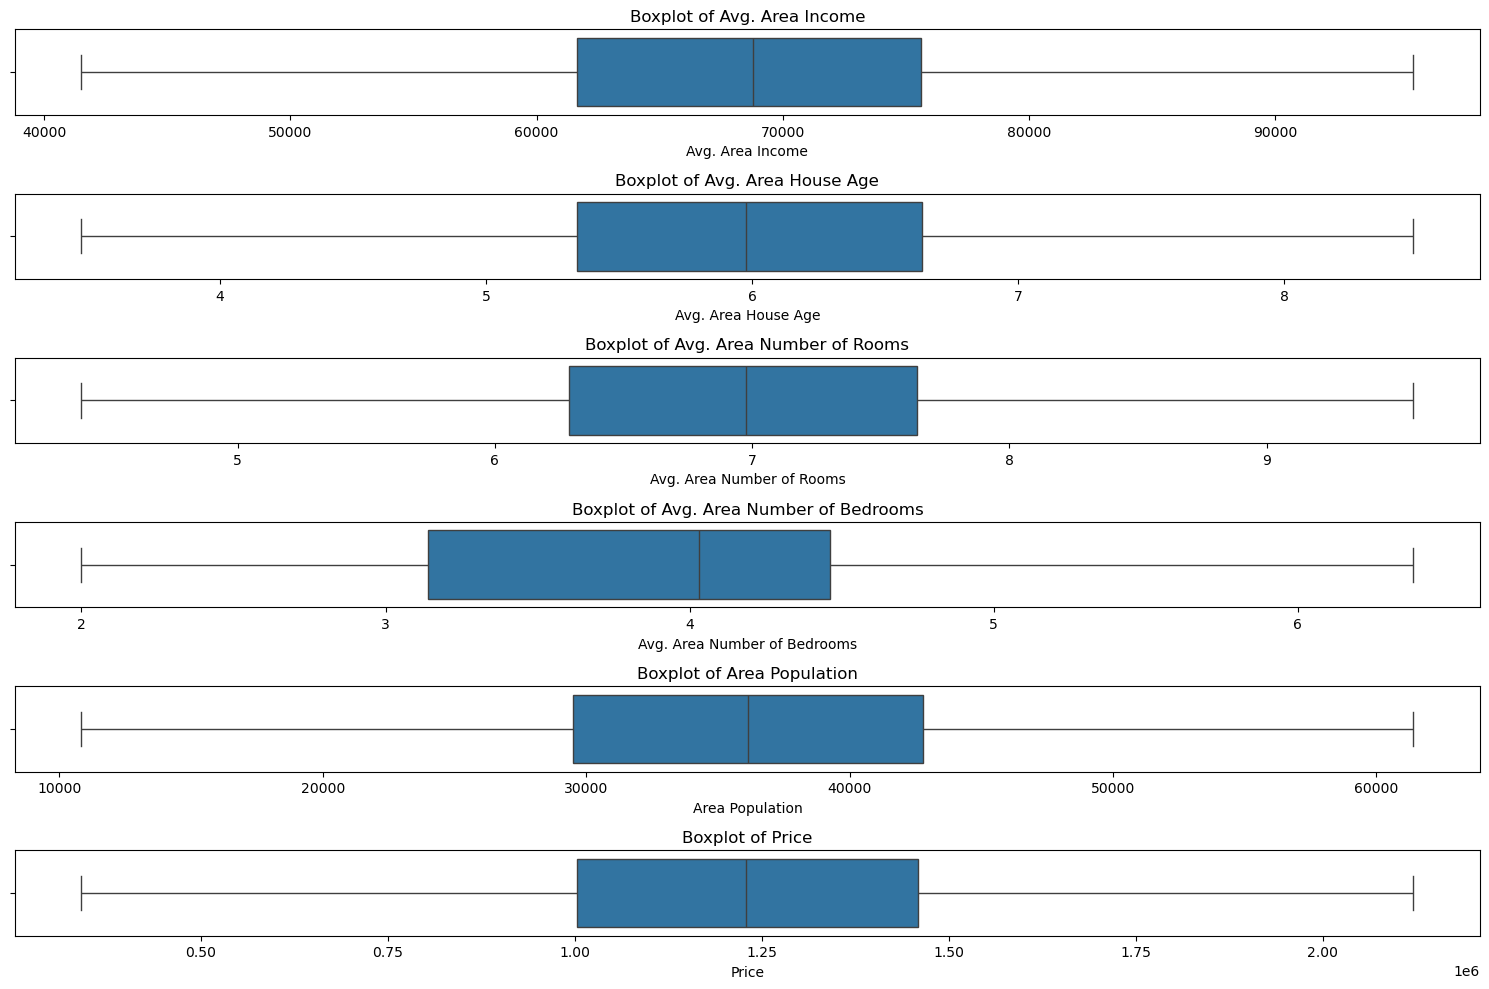

In [7]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [8]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [9]:
df['State'] = df['Address'].str.extract(r'([A-Z]{2})')

df[['Address', 'State']]

C:\Users\ramiz\AppData\Local\Temp\ipykernel_5152\2739443653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['Address'].str.extract(r'([A-Z]{2})')


,Address,State
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,USS Barnett\nFPO AP 44820,US
4,USNS Raymond\nFPO AE 09386,US
...,...,...
4995,USNS Williams\nFPO AP 30153-7653,US
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352",PS
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",VA
4998,USS Wallace\nFPO AE 73316,US


In [10]:
df.drop('Address', axis=1, inplace=True)
df

C:\Users\ramiz\AppData\Local\Temp\ipykernel_5152\4169721474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Address', axis=1, inplace=True)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,US
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,US
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,US
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,PS
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,VA
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,US


In [11]:
df['State'].value_counts()

State
US    169
PS    159
DP    148
OR     87
GU     85
     ... 
WI     62
SC     61
IL     59
MD     59
VI     49
Name: count, Length: 62, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

C:\Users\ramiz\AppData\Local\Temp\ipykernel_5152\234061226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = le.fit_transform(df['State'])


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int32']).columns

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Price', axis=1)
y = df['Price']

X = scaler.fit_transform(df[numerical_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6.614715115170799e-20
R-squared: 1.0


In [15]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(comparison_df)

            Actual     Predicted
868   1.376638e+06  1.376638e+06
1969  1.387988e+06  1.387988e+06
2663  1.298981e+06  1.298981e+06
2901  7.723102e+05  7.723102e+05
36    1.233220e+06  1.233220e+06
...            ...           ...
2992  1.435262e+06  1.435262e+06
387   1.343606e+06  1.343606e+06
1352  1.435981e+06  1.435981e+06
3353  7.163165e+05  7.163165e+05
4662  1.571848e+06  1.571848e+06

[927 rows x 2 columns]


In [16]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean()}")

Cross-Validation R² Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean R²: 1.0


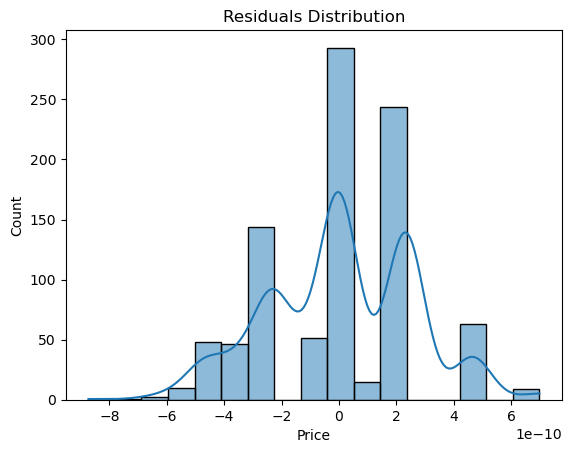

In [17]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()